<a href="https://colab.research.google.com/github/he16946/Data_Labs/blob/master/BankNote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Counterfiet Data

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import (cross_validate, cross_val_score, KFold,
                                      train_test_split, StratifiedKFold, 
                                       StratifiedShuffleSplit)
from sklearn.tree import DecisionTreeClassifier,  DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from matplotlib.patches import Patch
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## Downloading data

In [2]:
os.environ['KAGGLE_USERNAME'] = "ce889group3" # username from the json file

os.environ['KAGGLE_KEY'] = "f0ec34f29bf37cceb765b25f5a1bce2c" # key from the json file

! kaggle datasets download -d shantanuss/banknote-authentication-uci

banknote-authentication-uci.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
! unzip -q "banknote-authentication-uci.zip"

replace BankNoteAuthentication.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
df = pd.read_csv("BankNoteAuthentication.csv")

In [5]:
df.head

<bound method NDFrame.head of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

In [6]:
print("Total count: ", df['class'].count())

Total count:  1372


In [7]:
print("Counterfiet: ", df['class'].value_counts()[1])
print("Authentic: ", df['class'].value_counts()[0])

Counterfiet:  610
Authentic:  762


In [8]:
print('Counterfiet', round(df['class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Authentic', round(df['class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

Counterfiet 44.46 % of the dataset
Authentic 55.54 % of the dataset


## Creating imbalance

In [0]:
counterfiet = df.loc[df['class'] == 1]
authentic = df.loc[df['class'] == 0]

In [0]:
newcounterfiet = counterfiet.sample(n = 260, random_state = 1)

In [0]:
imb = [authentic, newcounterfiet]
imb = pd.concat(imb)

In [12]:
print('Counterfiet', round(imb['class'].value_counts()[1]/len(imb) * 100,2), '% of the dataset')
print('Authentic', round(imb['class'].value_counts()[0]/len(imb) * 100,2), '% of the dataset')

Counterfiet 25.44 % of the dataset
Authentic 74.56 % of the dataset


## Preprocessing

No columns need to be removed

In [13]:
imb.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [14]:
norm = ((imb - imb.min())/(imb.max()-imb.min()))
norm.head()

,variance,skewness,curtosis,entropy,class
0,0.768909,0.839643,0.106783,0.736628,0.0
1,0.835591,0.820982,0.121804,0.644326,0.0
2,0.786541,0.416648,0.310608,0.786951,0.0
3,0.757005,0.871699,0.054921,0.450440,0.0
4,0.531385,0.348662,0.424662,0.687362,0.0


In [15]:
features = list(norm.columns[0:4])
print(features)

['variance', 'skewness', 'curtosis', 'entropy']


In [0]:
x = norm[features]
y = norm['class']

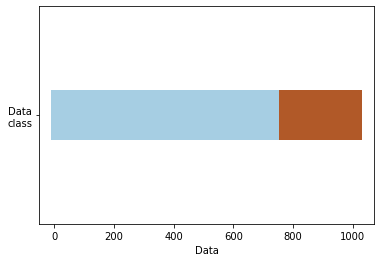

In [17]:
cmap_data = plt.cm.Paired
def visualize_classes(classes):
    fig, ax = plt.subplots()
    ax.scatter(range(len(classes)),  [3.5] * len(classes), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(yticks=[3.5],
           yticklabels=['Data\nclass'], xlabel="Data")


visualize_classes(y)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

## Classifiers and Cross validation

**Dummy Classifier**

In [19]:
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(x_train, y_train)
dummy.score(x_test, y_test)  

0.46484375

**Decision Tree**

In [20]:
dt = DecisionTreeClassifier(min_samples_split = 30, max_depth = 4, random_state = 32)
dt.fit(x_train, y_train)
print("DT score: ", dt.score(x_test, y_test))
print("Train score: ", cross_validate(dt, x_train, y_train)['test_score'].mean())
print("Test score: ", cross_validate(dt, x_test, y_test)['test_score'].mean())

DT score:  0.96484375
Train score:  0.9517018928783635
Test score:  0.9220211161387633


Feature importances

> One feature has zero importance

Feature ranking:
1. variance (0.596689)
2. skewness (0.309718)
3. curtosis (0.093594)
4. entropy (0.000000)


(0.0, 0.6265229767661425)

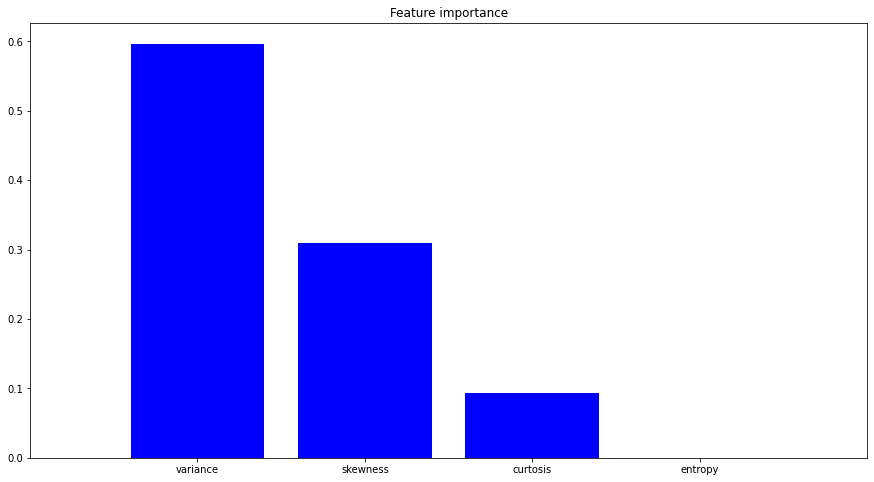

In [21]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

fig = plt.figure()
plt.title("Feature importance")
plt.bar(range(x.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(x.shape[1]), np.array(features)[indices])
plt.xlim([-1, x.shape[1]])
fig.set_size_inches(15, 8)
axes = plt.gca()
axes.set_ylim([0, None])

**Random Forest**

In [22]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = 32)
rf.fit(x_train, y_train)
print("DT score: ", rf.score(x_test, y_test))
print("Train score: ", cross_validate(rf, x_train, y_train)['test_score'].mean())
print("Test score: ", cross_validate(rf, x_test, y_test)['test_score'].mean())

DT score:  0.953125
Train score:  0.9504201680672268
Test score:  0.9686274509803923


Feature importances

>All features have non-zero importance

Feature ranking:
1. variance (0.523010)
2. skewness (0.282809)
3. curtosis (0.129580)
4. entropy (0.064600)


(0.0, 0.6975215636985113)

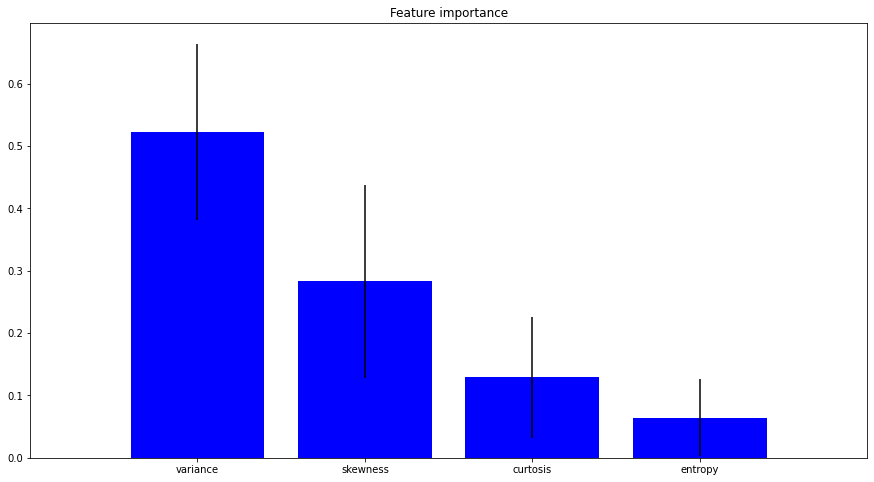

In [23]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

fig = plt.figure()
plt.title("Feature importance")
plt.bar(range(x.shape[1]), importances[indices], color="b", yerr=std[indices],align="center")
plt.xticks(range(x.shape[1]), np.array(features)[indices])
plt.xlim([-1, x.shape[1]])
fig.set_size_inches(15, 8)
axes = plt.gca()
axes.set_ylim([0, None])

**Decision Tree Regressor**

In [24]:
tr = DecisionTreeRegressor(random_state = 0, max_depth = 4, min_samples_split= 30)
tr.fit(x_train, y_train)
print("Test score: ", tr.score(x_test, y_test))
print("CrossVal score: ", cross_validate(tr, x_test, y_test, cv = 10)['test_score'].mean())

Test score:  0.8271800691759207
CrossVal score:  0.6036188520251854


**KFold Cross validation**

In [0]:
stnd = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(stnd, logit)
kf = KFold(n_splits = 10)

In [26]:
cv_results = cross_val_score(pipeline, x, y, cv=kf,scoring="accuracy", n_jobs=-1)
cv_results.mean()

0.9824005330287454

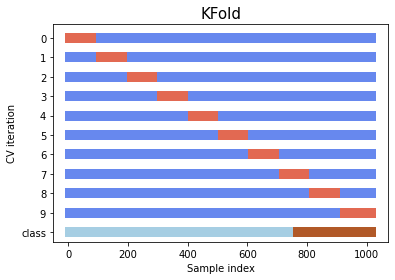

In [27]:
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)
        
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)
    
    yticklabels = list(range(n_splits)) + ['class']
    ax.set(yticks=np.arange(n_splits+1) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+1, -.2])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

fig, ax = plt.subplots()
plot_cv_indices(kf, x, y, ax, 10)

## Startified KFold

In [0]:
skf = StratifiedKFold(n_splits=10)

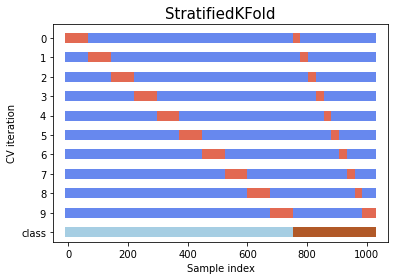

In [29]:
def plot_scv_indices(cv, X, y, ax, n_splits, lw=10):
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    yticklabels = list(range(n_splits)) + ['class']
    ax.set(yticks=np.arange(n_splits+1) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+1, -.2])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

fig, ax = plt.subplots()
plot_scv_indices(skf, x, y, ax, 10)

For n_clusters = 2 The average silhouette_score is : 0.3538498268215159
For n_clusters = 3 The average silhouette_score is : 0.3279611563980097
For n_clusters = 4 The average silhouette_score is : 0.3239722844511837
For n_clusters = 5 The average silhouette_score is : 0.33402343412924
For n_clusters = 6 The average silhouette_score is : 0.3222923316683752


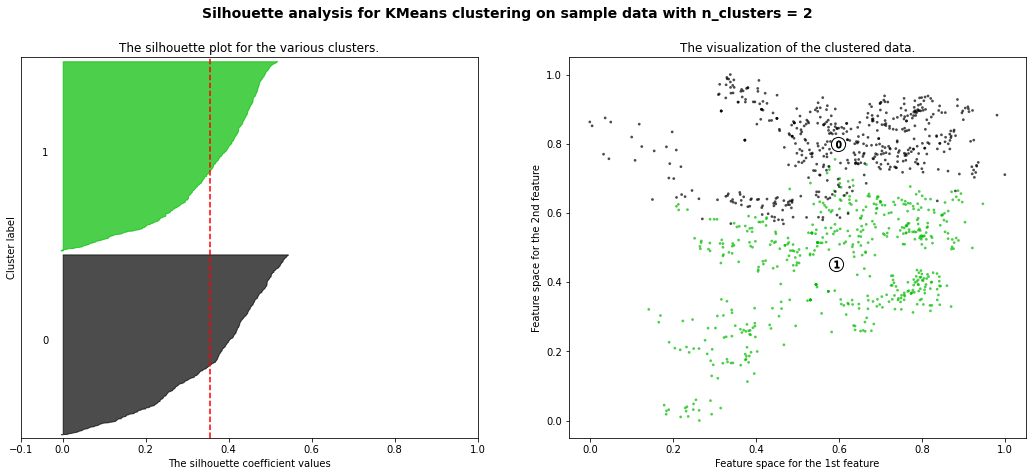

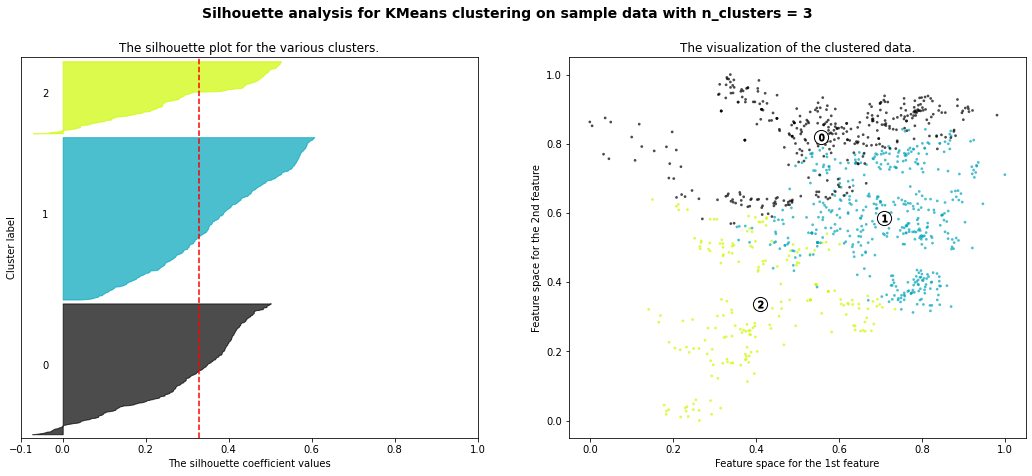

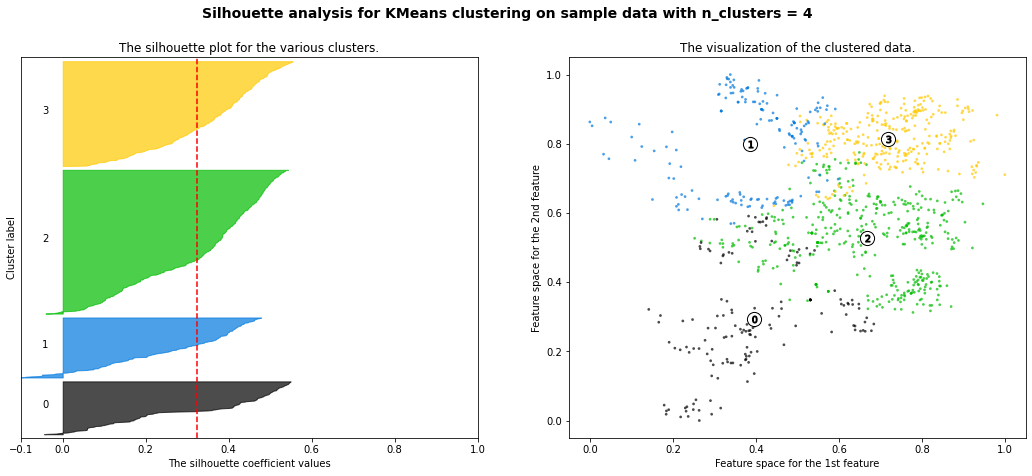

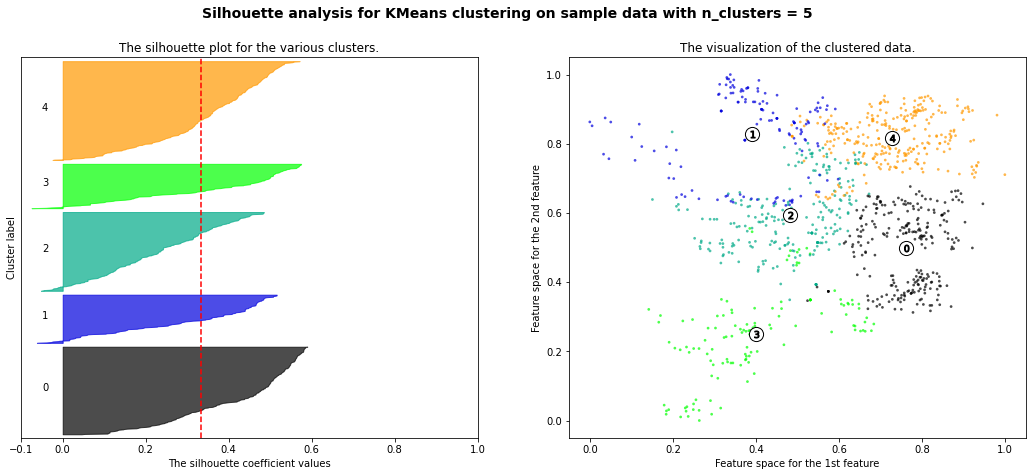

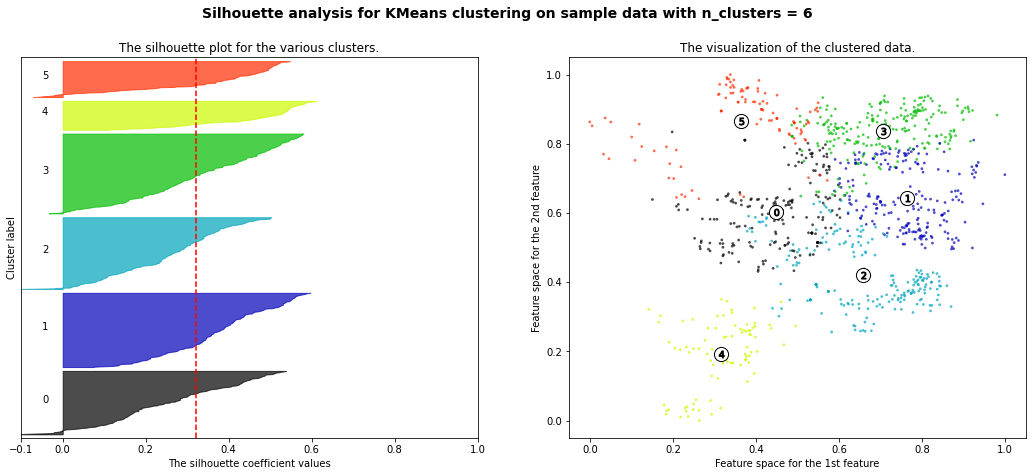

In [64]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()